# Classical Algorithms : Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
df = pd.read_csv(file_path)

In [ ]:
# Define target and features
target = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux', 'h_alpha_flux_err',
    'nii_6584_flux', 'nii_6584_flux_err', 'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16',
    'mendel_logM_p84', 'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50', 'mendel_logMb_p16',
    'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g',
    'simard_b_t_r', 'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re',
    'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

X = df[features]
y = df[target]

In [ ]:
# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Split data into training and testing sets with 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the error and accuracy
errors = [mse, rmse, mae]
range_y = y_test.max() - y_test.min()
accuracy = [(1 - error / range_y) * 100 for error in errors]
accuracy_r2 = r2 * 100

# Print error metrics and accuracy
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R^2): {r2:.4f}')
print(f'Accuracy based on MSE: {accuracy[0]:.2f}%')
print(f'Accuracy based on RMSE: {accuracy[1]:.2f}%')
print(f'Accuracy based on MAE: {accuracy[2]:.2f}%')



Mean Squared Error (MSE): 0.2348
Root Mean Squared Error (RMSE): 0.4845
Mean Absolute Error (MAE): 0.3921
R-squared (R^2): 0.4201
Accuracy based on MSE: 94.32%
Accuracy based on RMSE: 88.28%
Accuracy based on MAE: 90.52%


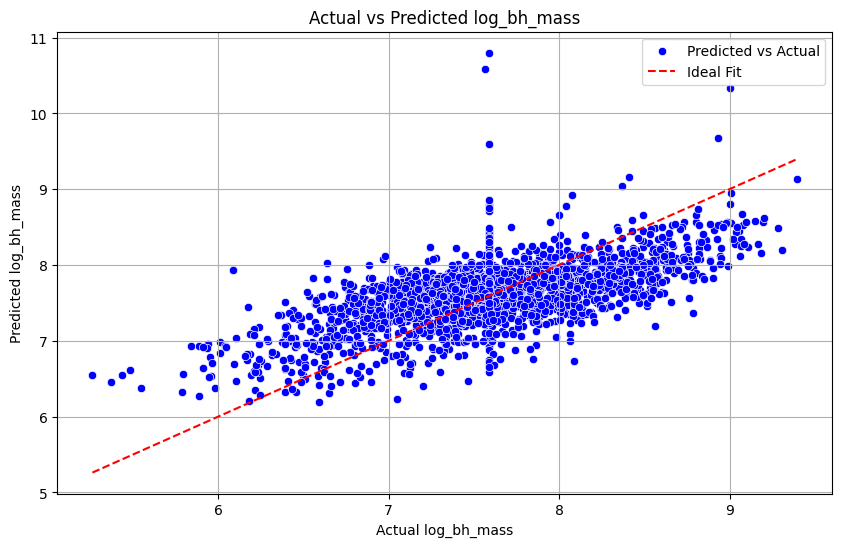

In [ ]:
# Visualize the results with the ideal fit line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.legend()
plt.grid(True)
plt.show()